Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Breno de Castro Pimenta"
COLLABORATORS = ""

---

# Lista 08 - Comparando Classificadores

# Exercício 01:

Analise o desempenho do kNN e de uma Regressão Logística Regularizada para **pelo menos um** dos conjuntos de dados abaixo:

* [Avaliação de carros](http://archive.ics.uci.edu/ml/datasets/Car+Evaluation)
* [Avaliação de vinhos](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)
* [Resultados de partidas do jogo Dota](http://archive.ics.uci.edu/ml/datasets/Dota2+Games+Results) (desafiador!)

Para a questão, faça as seguintes tarefas:

* Realize treino, validação e teste
* Compare as métricas no teste
* Reporte a precisão, revocação, F1 e a matriz de confusão

Como já estamos no fim da matéria, você pode agora fazer uso da biblioteca scikit-learn. Afinal, no dia a dia, não implementamos tudo do zero. Abaixo temos os imports que vocês precisam. Leiam a API da biblioteca para saber como fazer uso da mesma.

In [2]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from sklearn.neighbors import KNeighborsClassifier

# Um fator importante é que o SKLearn não cria conjuntos de validação para você. Você tem algumas abordagens,
# uma é realizar um novo split no treino. Outra é fazer uso de classificadores com CV no fim.
# Tipo LogisticRegressionCV (ver na API). Por fim, você pode fazer uso da classe GridSearchCV.
# Leia a documentação da mesma.
from sklearn.model_selection import train_test_split

In [3]:
# YOUR CODE HERE
from scipy import stats as ss

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

### Objetivo: Neste TP tentaremos prever a qualidade de vinhos brancos

A ideia básica do dataset de vinhos é a classificação, a partir dos atributos apresentados, entre vinhos brancos e tintos. No entanto, é de conhecimento comum a diferenciação entre ambos os tipos. Portanto este trabalho propõe uma abordagem menos trivial, que a partir dos atributos apresentados conseguir classificar os vinhos em relação a sua qualidade. <br>Optou-se, então, por separar apenas um tipo de vinho, para assim aumentar a possibilidade de convergência dos modelos ao diminuir a complexidade da previsão, pois pode haver características de que traz qualidade para um tipo de vinho que não é verdade para o outro.<br> 
Diante dessas decisões, o vinho escolhido foi o branco, por ter um dataset quase três vezes maior e apresentar mais de 20% do que será denotado como vinho de qualidade, porcentagem suficiente para realizar uma previsão.

In [4]:
df = pd.read_csv('winequality-white.csv', sep=';')
df.head(16)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.0              0.27         0.36           20.70      0.045   
1             6.3              0.30         0.34            1.60      0.049   
2             8.1              0.28         0.40            6.90      0.050   
3             7.2              0.23         0.32            8.50      0.058   
4             7.2              0.23         0.32            8.50      0.058   
5             8.1              0.28         0.40            6.90      0.050   
6             6.2              0.32         0.16            7.00      0.045   
7             7.0              0.27         0.36           20.70      0.045   
8             6.3              0.30         0.34            1.60      0.049   
9             8.1              0.22         0.43            1.50      0.044   
10            8.1              0.27         0.41            1.45      0.033   
11            8.6              0.23         0.40            4.20      0.035   
12            7.9              0.18         0.37            1.20      0.040   
13            6.6              0.16         0.40            1.50      0.044   
14            8.3              0.42         0.62           19.25      0.040   
15            6.6              0.17         0.38            1.50      0.032   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  45.0                 170.0   1.0010  3.00       0.45   
1                  14.0                 132.0   0.9940  3.30       0.49   
2                  30.0                  97.0   0.9951  3.26       0.44   
3                  47.0                 186.0   0.9956  3.19       0.40   
4                  47.0                 186.0   0.9956  3.19       0.40   
5                  30.0                  97.0   0.9951  3.26       0.44   
6                  30.0                 136.0   0.9949  3.18       0.47   
7                  45.0                 170.0   1.0010  3.00       0.45   
8                  14.0                 132.0   0.9940  3.30       0.49   
9                  28.0                 129.0   0.9938  3.22       0.45   
10                 11.0                  63.0   0.9908  2.99       0.56   
11                 17.0                 109.0   0.9947  3.14       0.53   
12                 16.0                  75.0   0.9920  3.18       0.63   
13                 48.0                 143.0   0.9912  3.54       0.52   
14                 41.0                 172.0   1.0002  2.98       0.67   
15                 28.0                 112.0   0.9914  3.25       0.55   

    alcohol  quality  
0       8.8        6  
1       9.5        6  
2      10.1        6  
3       9.9        6  
4       9.9        6  
5      10.1        6  
6       9.6        6  
7       8.8        6  
8       9.5        6  
9      11.0        6  
10     12.0        5  
11      9.7        5  
12     10.8        5  
13     12.4        7  
14      9.7        5  
15     11.4        7

* Analisando a distribuição da qualidade:

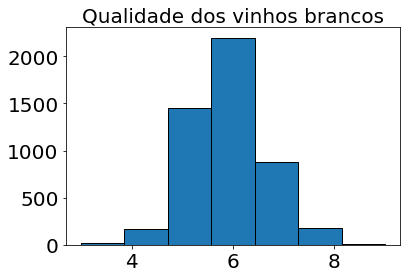

In [5]:
plt.hist(df['quality'], bins=7, edgecolor='k')
plt.title('Qualidade dos vinhos brancos')
plt.show()

* Separar os vinhos com uma qualidade melhor, acima da média:

In [6]:
media_qualidade = round(df['quality'].mean(), 0)
print('Média da qualidade: ', media_qualidade)
print("Quantidade de vinhos: ", len(df))
print("Vinhos acima da média: ", len(df[df['quality'] >= 7]))
print("Representa: ", round((len(df[df['quality'] >= 7])/len(df))*100,2), "%")

Média da qualidade:  6.0
Quantidade de vinhos:  4898
Vinhos acima da média:  1060
Representa:  21.64 %


In [7]:
df.loc[df['quality'] <= media_qualidade, 'quality'] = 0
df.loc[df['quality'] > media_qualidade, 'quality'] = 1

In [8]:
df.iloc[12:16]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
12            7.9              0.18         0.37            1.20      0.040   
13            6.6              0.16         0.40            1.50      0.044   
14            8.3              0.42         0.62           19.25      0.040   
15            6.6              0.17         0.38            1.50      0.032   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
12                 16.0                  75.0   0.9920  3.18       0.63   
13                 48.0                 143.0   0.9912  3.54       0.52   
14                 41.0                 172.0   1.0002  2.98       0.67   
15                 28.0                 112.0   0.9914  3.25       0.55   

    alcohol  quality  
12     10.8        0  
13     12.4        1  
14      9.7        0  
15     11.4        1

### Separando treino e teste

* Separando o classificador

In [9]:
X = df.copy()
X.drop('quality', axis=1, inplace=True)
y = df['quality']
X.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9

* Separando o dataset em treino e teste, 80/20

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(3918, 11)
(980, 11)


### Normalizando:

* Z-normalizando todas as colunas numéricas, no caso deste dataset todas as colunas dos atríbutos:

In [11]:
mean_train = X_train.mean()
std_train = X_train.std(ddof=1)

Z_train = X_train.copy()
Z_train = X_train - mean_train
Z_train = Z_train / std_train

Z_test = X_test.copy()
Z_test = X_test - mean_train
Z_test = Z_test / std_train

## Treinando:

### KNN

* Validação cruzada:

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score

In [13]:
skf = StratifiedKFold(n_splits=100)
best_ks = []
for train_index, val_index in skf.split(Z_train, y_train):
    best_precision = (0,0)
    for k in [1,2,3,5,7,11,13,17]:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(Z_train.values[train_index], y_train.values[train_index])
        
        y_val = y_train.values[val_index]
        y_hat = model.predict(Z_train.values[val_index])
        precision = precision_score(y_true=y_val, y_pred=y_hat)
        
        if precision > best_precision[1]:
            best_precision = (k, precision)
    best_ks.append(best_precision[0])

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


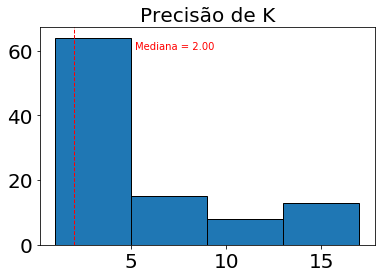

In [14]:
mediana_k = int(np.median(best_ks))
plt.hist(best_ks, bins=4, edgecolor='k')
plt.axvline(mediana_k, color='r', linestyle='dashed', linewidth=1)
plt.title('Precisão de K')
min_ylim, max_ylim = plt.ylim()
plt.text(mediana_k*2.6, max_ylim*0.9, 'Mediana = {:.2f}'.format(mediana_k), color='r')
plt.show()

* Prevendo:

In [15]:
model = KNeighborsClassifier(n_neighbors=mediana_k)
model.fit(Z_train, y_train)
previsao_knn = model.predict(Z_test)

In [16]:
precision_recall_fscore_support(y_pred=previsao_knn, y_true=y_test)

(array([0.85409652, 0.84269663]),
 array([0.98193548, 0.36585366]),
 array([0.91356543, 0.51020408]),
 array([775, 205], dtype=int64))

In [17]:
precision_score(y_true=y_val, y_pred=y_hat)

0.6

Text(0.5,0,'Verdadeiro')

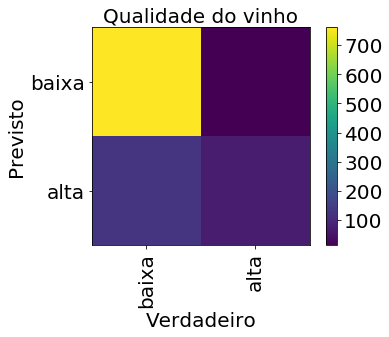

In [31]:
plt.imshow(confusion_matrix(y_true=y_test, y_pred=previsao_knn))
plt.xticks([0,1], ['baixa', 'alta'], rotation=90)
plt.yticks([0,1], ['baixa', 'alta'])
plt.colorbar()
plt.title('Qualidade do vinho')
plt.ylabel('Previsto')
plt.xlabel('Verdadeiro')

### Regressão Logística

In [19]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(
    Cs = 100,
    penalty='l2',
    cv=5,
    fit_intercept=False
)

model.fit(Z_train, y_train)
previsao_logistica = model.predict(Z_test)

Text(0.5,0,'Verdadeiro')

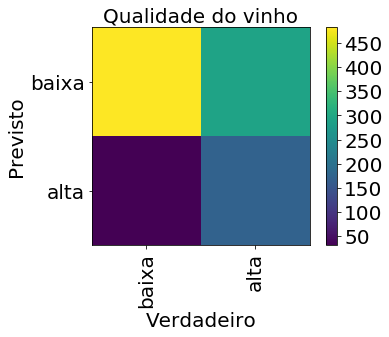

In [30]:
plt.imshow(confusion_matrix(y_true=y_test, y_pred=previsao_logistica))
plt.xticks([0,1], ['baixa', 'alta'], rotation=90)
plt.yticks([0,1], ['baixa', 'alta'])
plt.colorbar()
plt.title('Qualidade do vinho')
plt.ylabel('Previsto')
plt.xlabel('Verdadeiro')

## Comparação:

In [21]:
comparacao = {}
comparacao['Regressao Logistica'] = precision_recall_fscore_support(y_true=y_test , y_pred=previsao_logistica, average='binary')[:-1]
comparacao['KNN'] = precision_recall_fscore_support(y_true=y_test , y_pred=previsao_knn, average='binary')[:-1]

df_comparacao = pd.DataFrame.from_dict(comparacao, orient='index', columns=['Precisão', 'Revocação', 'F1'])

In [22]:
df_comparacao

Precisão  Revocação        F1
Regressao Logistica  0.371245   0.843902  0.515648
KNN                  0.842697   0.365854  0.510204

Explique e discuta sobre os resultados encontrados no campo abaixo.

O resultado que primeiramente chama mais a atenção é a disparidade da precisão entre os dois modelos, tendo o KNN atingido uma precisão muito maior.<br>

Para analisar esse resultado repare na diferença entre as matrizes de confusão, onde é nítido que ambos os modelos tiveram ótimos resultados em '_True Positives_' (TP), ou seja ambos os modelos tiveram um bom índice de acertos em encontrar vinhos de boa qualidade, quando se depararam com vinhos de boa qualidade. <br>


No entanto o modelo de Regressão Logística, diferentemente do modelo KNN, apresentou um alto índice de '_False Positive_'(FP) e um baixo índice de '_False Negative_', acarretando em uma baixa precisão e em uma alta revocação. Ou seja, o modelo logístico está minimizando o erro de prever vinhos de baixa qualidade, quando na verdade são de boa qualidade.<br>

E o modelo KNN, está realizando o opostos do modelo logístico, tendo um baixo índice de '_False Positive_'(FP) e um alto índice de '_False Negative_', acarretando em uma alta precisão e em uma baixa revoação. Ou seja, o modelo KNN está minimizando o erro de prever vinhos de boa qualidade, quando na verdade são de baixa qualidade.<br>

Exatamente por essa diferença oposta do caráter dos modelos gerados, a média harmônica, demonstrada pela métrica F1, equipara os dois resultados ao medir a precisão e revocação ao mesmo tempo. <br>

A escolha pela classificação da qualidade trouxe resultados muito interessantes, essa assimetria oposta dos dois modelos geraram uma conclusão muito benéfica para o aprendizado e entendimento da disciplina.

**Lembrando que o conceito de vinhos de boa qualidade foi definido no início deste notebook como vinhos acima da média.**